In [1]:
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [2]:
data=pandas.read_csv("abalone.csv")
data.head(2)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: 
```python 
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else 0)) ```

In [3]:
data['Sex']=data['Sex'].map(lambda x: 1 if x=='M' else 0)

Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [4]:
X = data.loc[:, 'Sex':'ShellWeight']
y = data['Rings']

Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [5]:
scores=list()
CV=KFold(n_splits=5,shuffle=True,random_state=1)
for i in range(1,51):
    clf = RandomForestRegressor(n_estimators=i,random_state=1)
    clf.fit(X, y)
    scores.append(cross_val_score(clf, X, y, cv=CV, scoring = 'r2'))

Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [6]:
n_forest=list()
for n, val in enumerate(scores):
    if scores[n].mean() > 0.52:
        n_forest.append(n)
        
n_forest[0]

27

Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

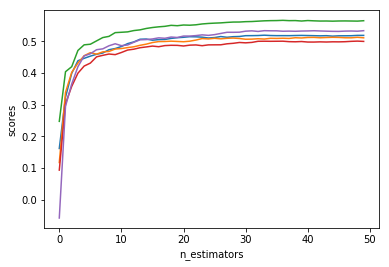

In [7]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.savefig('estimators_score.png')